Create a list of models' mean error between seeds and sort them.

In [1]:
import os
import regex as re
import pandas as pd
import json

# Define the directory path
directory = '/Volumes/NNFunction/Trial3output/saved/both'

# Initialize an empty dataframe
df = pd.DataFrame(columns=['Seed', 'Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size', 'Model MAE', 'Validation MAE',
 "Model Max AE", "Validation Max AE", "Model Wrong i_a", "Validation Wrong i_a",
"Model Consumption MAE", "Validation Consumption MAE", "Model Consumption Max AE", "Validation Consumption Max AE", 
"Model i_a MAE", "Validation i_a MAE", "Model i_a Max AE", "Validation i_a Max AE"])
for root, _,files in os.walk(directory):
    for filename in files:

        if filename.endswith('.log'):
            filepath = os.path.join(root, filename)
            
            # Read the contents of the file
            with open(filepath, 'r') as file:
                content = file.read()  

            # Extract the seed, model type, max nodes, and learning rate from the corresponding config file

            configpath = filepath.replace('info.log', 'config.json')
            configpath = configpath.replace('log', 'models')
            print(configpath)
            with open(configpath, 'r') as f:
                config = json.load(f)
            seed = config["seed"]
            model_type = config["arch"]["type"]
            max_nodes = config["arch"]["args"]["max_nodes"]
            learning_rate = config["optimizer"]["args"]["lr"]
            batch_size = config["data_loader"]["args"]["batch_size"]

            print(seed, model_type, max_nodes,learning_rate, batch_size)   



            # Extract the MAE value just before the last instance of saving the best model
            with open(filepath, 'r') as file:
                text = file.read()

            best_loc = text.rfind('Saving current best: model_best.pth ...')

            before_best = text[:best_loc]

            mmaetarget = re.search(r'\s+model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            model_mae= float(mmaetarget.group(1))
            mmxaetarget = re.search(r'\s+model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            model_max_ae= float(mmxaetarget.group(1))
            mwiatarget = re.search(r'\s+n_wrong_i_a\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            model_wrong_i_a= float(mwiatarget.group(1))
            cmaetarget = re.search(r'\s+consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            consumption_mae= float(cmaetarget.group(1))
            cmaxaetarget = re.search(r'\s+consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            consumption_max_ae= float(cmaxaetarget.group(1))
            iamaetarget = re.search(r'\s+i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            i_a_mae= float(iamaetarget.group(1))
            iamxaetarget = re.search(r'\s+i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            i_a_max_ae= float(iamxaetarget.group(1))
            vmaetarget = re.search(r'\s+val_model_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_mae= float(vmaetarget.group(1))        
            vmxaetarget = re.search(r'\s+val_model_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_max_ae= float(vmxaetarget.group(1))
            vwiatarget = re.search(r'\s+val_n_wrong_i_a\s*:\s+(\d+)', before_best, re.REVERSE)
            val_wrong_i_a= float(vwiatarget.group(1))
            vcmaetarget = re.search(r'\s+val_consumption_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_consumption_mae= float(vcmaetarget.group(1))
            vcmaxaetarget = re.search(r'\s+val_consumption_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_consumption_max_ae= float(vcmaxaetarget.group(1))
            viamaetarget = re.search(r'\s+val_i_a_mae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_i_a_mae= float(viamaetarget.group(1))
            viamxaetarget = re.search(r'\s+val_i_a_max_ae\s*:\s+(\d+\.?\d*)', before_best, re.REVERSE)
            val_i_a_max_ae= float(viamxaetarget.group(1))
            #print(f"model_mae: {model_mae},\n val_mae: {val_mae},\n model_max_ae: {model_max_ae},\n val_max_ae: {val_max_ae},\n model_wrong_i_a: {model_wrong_i_a},\n val_wrong_i_a: {val_wrong_i_a},\n consumption_mae: {consumption_mae},\n val_consumption_mae: {val_consumption_mae},\n consumption_max_ae: {consumption_max_ae},\n val_consumption_max_ae: {val_consumption_max_ae},\n i_a_mae: {i_a_mae},\n val_i_a_mae: {val_i_a_mae},\n i_a_max_ae: {i_a_max_ae},\n val_i_a_max_ae: {val_i_a_max_ae}")

           
            # Append the data to the dataframe
            df = pd.concat([df,pd.DataFrame.from_records([{'Seed': seed, 'Model Type': model_type, 'Max Nodes': max_nodes, "Learning Rate": learning_rate, "Batch Size": batch_size, 
             'Model MAE': model_mae, 'Validation MAE':val_mae, "Model Max AE": model_max_ae, "Validation Max AE":val_max_ae, 
             "Model Wrong i_a": model_wrong_i_a, "Validation Wrong i_a":val_wrong_i_a, "Model Consumption MAE": consumption_mae, "Validation Consumption MAE":val_consumption_mae, 
             "Model Consumption Max AE": consumption_max_ae, "Validation Consumption Max AE":val_consumption_max_ae, "Model i_a MAE": i_a_mae, "Validation i_a MAE":val_i_a_mae, 
             "Model i_a Max AE": i_a_max_ae, "Validation i_a Max AE":val_i_a_max_ae}])])

# Print the resulting dataframe
print(df)
df.to_csv('nnperformance.csv', index=False)


/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_59112/1152800438.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_59112/1152800438.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame.from_records([{'Seed': seed, 'Model Type': model_type, 'Max Nodes'

/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_154946/config.json
42 FourLayer 1024 0.001 64
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_160414/config.json
42 FourLayer 1024 0.001 512
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_161921/config.json
42 FourLayer 1024 0.01 512
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_155913/config.json
42 FourLayer 1024 0.001 128
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_161404/config.json
42 FourLayer 1024 0.01 128
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_164202/config.json
42 FourLayer 1024 0.0001 512
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_160736/config.json
42 FourLayer 1024 0.01 64
/Volumes/NNFunction/Trial3output/saved/both/S42/models/both_FourLayer_1024/0409_163647/config.json
42 FourLayer 102

In [15]:
means=df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[df.columns[5:19]].mean()


print(f'Lowest Model MAE: {means.loc[means["Model MAE"].idxmin()].name}')
print(f'Lowest Validation MAE: {means.loc[means["Validation MAE"].idxmin()].name}')
print(f'Lowest Model Max AE: {means.loc[means["Model Max AE"].idxmin()].name}')
print(f'Lowest Validation Max AE: {means.loc[means["Validation Max AE"].idxmin()].name}')
print(f'Lowest Model Wrong i_a: {means.loc[means["Model Wrong i_a"].idxmin()].name}')
print(f'Lowest Validation Wrong i_a: {means.loc[means["Validation Wrong i_a"].idxmin()].name}')
print(f'Lowest Model Consumption MAE: {means.loc[means["Model Consumption MAE"].idxmin()].name}')
print(f'Lowest Validation Consumption MAE: {means.loc[means["Validation Consumption MAE"].idxmin()].name}')
print(f'Lowest Model Consumption Max AE: {means.loc[means["Model Consumption Max AE"].idxmin()].name}')
print(f'Lowest Validation Consumption Max AE: {means.loc[means["Validation Consumption Max AE"].idxmin()].name}')
print(f'Lowest Model i_a MAE: {means.loc[means["Model i_a MAE"].idxmin()].name}')
print(f'Lowest Validation i_a MAE: {means.loc[means["Validation i_a MAE"].idxmin()].name}')
print(f'Lowest Model i_a Max AE: {means.loc[means["Model i_a Max AE"].idxmin()].name}')
print(f'Lowest Validation i_a Max AE: {means.loc[means["Validation i_a Max AE"].idxmin()].name}')

Lowest Model MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model Max AE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation Max AE: ('PudgeSixLayer', 512, 0.001, 64)
Lowest Model Wrong i_a: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation Wrong i_a: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model Consumption MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation Consumption MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model Consumption Max AE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation Consumption Max AE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model i_a MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation i_a MAE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Model i_a Max AE: ('PudgeSixLayer', 1024, 0.001, 64)
Lowest Validation i_a Max AE: ('PudgeSixLayer', 512, 0.001, 64)


/var/folders/73/xt36gx2n50nfg3478nvjbx100000gn/T/ipykernel_59112/2820867928.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(max_nodes))


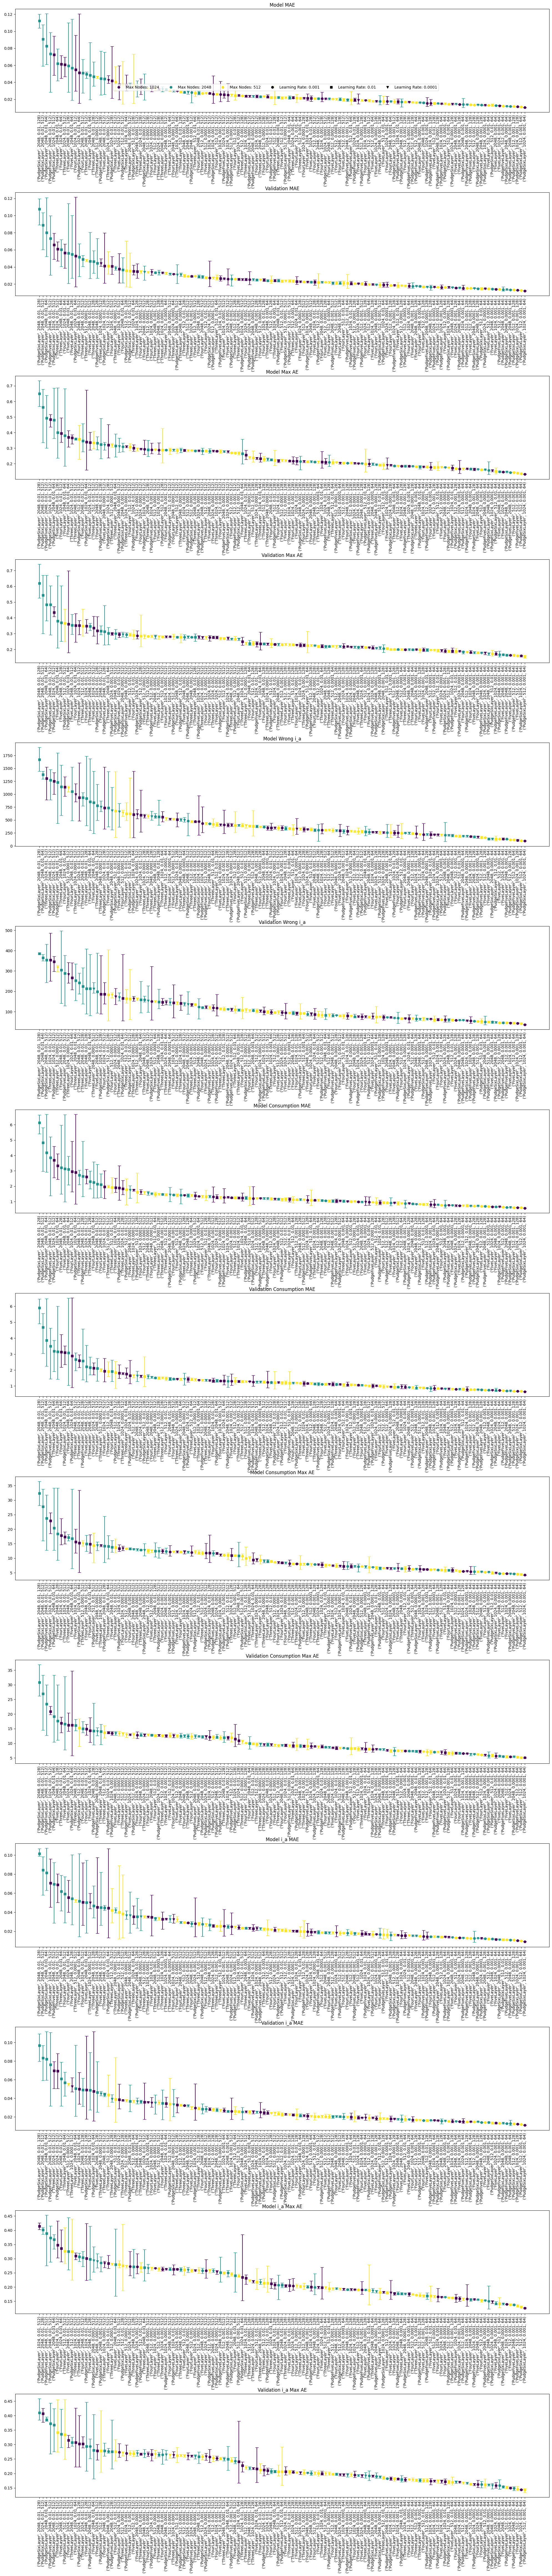

  Seed     Model Type Max Nodes  Learning Rate Batch Size  Model MAE  \
0   42  PudgeSixLayer      1024          0.001         64   0.010313   
0   21  PudgeSixLayer      1024          0.001         64   0.010246   
0   84  PudgeSixLayer      1024          0.001         64   0.010594   

   Validation MAE  Model Max AE  Validation Max AE  Model Wrong i_a  \
0        0.011917      0.134670           0.161193             96.0   
0        0.011921      0.133909           0.162696             98.0   
0        0.012206      0.130633           0.152614             97.0   

   Validation Wrong i_a  Model Consumption MAE  Validation Consumption MAE  \
0                  38.0               0.565387                    0.646043   
0                  35.0               0.564670                    0.637535   
0                  35.0               0.587869                    0.649579   

   Model Consumption Max AE  Validation Consumption Max AE  Model i_a MAE  \
0                  4.261884         

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Define the metrics
metrics = ['Model MAE', 'Validation MAE', 'Model Max AE', 'Validation Max AE', 
           'Model Wrong i_a', 'Validation Wrong i_a', 'Model Consumption MAE', 
           'Validation Consumption MAE', 'Model Consumption Max AE', 
           'Validation Consumption Max AE', 'Model i_a MAE', 'Validation i_a MAE', 
           'Model i_a Max AE', 'Validation i_a Max AE']

# Create a figure with 14 subplots arranged in a 14x1 grid
fig, axs = plt.subplots(14, 1, figsize=(20, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Define a color map for the max nodes
max_nodes = df['Max Nodes'].unique()
colors = plt.cm.get_cmap('viridis', len(max_nodes))
color_map = {node: colors(i) for i, node in enumerate(max_nodes)}

# Define a marker map for the learning rates
learning_rates = df['Learning Rate'].unique()
markers = ['o', 's', 'v', '^', '<', '>', '8', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
marker_map = {rate: markers[i % len(markers)] for i, rate in enumerate(learning_rates)}

# Create custom legend handles and labels
handles = [mlines.Line2D([], [], color=color_map[node], marker='o', linestyle='None') for node in max_nodes] + [mlines.Line2D([], [], color='black', marker=marker_map[rate], linestyle='None') for rate in learning_rates]
labels = [f'Max Nodes: {node}' for node in max_nodes] + [f'Learning Rate: {rate}' for rate in learning_rates]

# For each metric, create a scatter plot with error bars
for i, metric in enumerate(metrics):
    # Calculate the mean, min, and max for each group
    group_stats = df.groupby(['Model Type', 'Max Nodes', 'Learning Rate', 'Batch Size'])[metric].agg(['mean', 'min', 'max'])
    
    # Sort the groups in descending order based on mean value
    group_stats = group_stats.sort_values(by='mean', ascending=False)
    
    # Create the scatter plot with colors corresponding to the max nodes and markers corresponding to the learning rate
    x = np.arange(len(group_stats))
    for j, (group, stats) in enumerate(group_stats.iterrows()):
        model_type, max_node, learning_rate, _ = group
        axs[i].errorbar(j, stats['mean'], yerr=[[stats['mean']-stats['min']], [stats['max']-stats['mean']]], fmt=marker_map[learning_rate], capsize=4, color=color_map[max_node])
    
    # Set the title of the subplot
    axs[i].set_title(metric)
    
    # Set the x-ticks to be the group names
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(group_stats.index, rotation=90)

# Add the legend to the figure
fig.legend(handles, labels, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Leave more space for the x-axis names
plt.subplots_adjust(bottom=0.1)

# Show the plot
plt.show()

print(df[(df['Model Type'] == 'PudgeSixLayer') & (df['Max Nodes'] == 1024) & (df['Learning Rate'] == 0.001) & (df['Batch Size'] == 64)])